<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fully-connected-linear-network" data-toc-modified-id="Fully-connected-linear-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fully connected linear network</a></span><ul class="toc-item"><li><span><a href="#Get-temperature-data" data-toc-modified-id="Get-temperature-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get temperature data</a></span></li><li><span><a href="#Build-fully-connected-model" data-toc-modified-id="Build-fully-connected-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Build fully connected model</a></span></li><li><span><a href="#Predict-for-one-day" data-toc-modified-id="Predict-for-one-day-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predict for one day</a></span></li><li><span><a href="#Post-processing-with-rolling-window-for-2016" data-toc-modified-id="Post-processing-with-rolling-window-for-2016-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Post processing with rolling window for 2016</a></span></li><li><span><a href="#Train-2015,-predict-2016" data-toc-modified-id="Train-2015,-predict-2016-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Train 2015, predict 2016</a></span></li></ul></li><li><span><a href="#Neural-network-with-one-hidden-layer" data-toc-modified-id="Neural-network-with-one-hidden-layer-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neural network with one hidden layer</a></span><ul class="toc-item"><li><span><a href="#Build-network" data-toc-modified-id="Build-network-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Build network</a></span></li><li><span><a href="#Train-2015,-predict-2016" data-toc-modified-id="Train-2015,-predict-2016-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train 2015, predict 2016</a></span></li><li><span><a href="#Making-the-hidden-model-more-complex" data-toc-modified-id="Making-the-hidden-model-more-complex-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Making the hidden model more complex</a></span></li></ul></li><li><span><a href="#Add-station-embeddings" data-toc-modified-id="Add-station-embeddings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add station embeddings</a></span><ul class="toc-item"><li><span><a href="#Build-linear-embedding-model" data-toc-modified-id="Build-linear-embedding-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Build linear embedding model</a></span></li><li><span><a href="#Train-2015,-predict-2016" data-toc-modified-id="Train-2015,-predict-2016-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train 2015, predict 2016</a></span></li><li><span><a href="#Embedding-size-hyper-parameter-tuning" data-toc-modified-id="Embedding-size-hyper-parameter-tuning-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Embedding size hyper-parameter tuning</a></span></li></ul></li><li><span><a href="#Adding-auxiliary-variables" data-toc-modified-id="Adding-auxiliary-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Adding auxiliary variables</a></span><ul class="toc-item"><li><span><a href="#Load-extended-dataset" data-toc-modified-id="Load-extended-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load extended dataset</a></span></li><li><span><a href="#Linear-model" data-toc-modified-id="Linear-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear model</a></span></li><li><span><a href="#Hidden-model" data-toc-modified-id="Hidden-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hidden model</a></span></li><li><span><a href="#Even-more-variables" data-toc-modified-id="Even-more-variables-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Even more variables</a></span></li><li><span><a href="#Save-pickled-datasets" data-toc-modified-id="Save-pickled-datasets-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Save pickled datasets</a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Train model</a></span></li></ul></li><li><span><a href="#Additional-variables-with-the-embedding-model" data-toc-modified-id="Additional-variables-with-the-embedding-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Additional variables with the embedding model</a></span><ul class="toc-item"><li><span><a href="#Linear-model-with-embeddings" data-toc-modified-id="Linear-model-with-embeddings-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear model with embeddings</a></span></li><li><span><a href="#Hidden-model-with-embeddings" data-toc-modified-id="Hidden-model-with-embeddings-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Hidden model with embeddings</a></span></li><li><span><a href="#A-longer-training-period" data-toc-modified-id="A-longer-training-period-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>A longer training period</a></span></li><li><span><a href="#A-longer-training-period-with-more-data" data-toc-modified-id="A-longer-training-period-with-more-data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>A longer training period with more data</a></span></li></ul></li><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data augmentation</a></span></li></ul></div>

# Fully connected and neural networks

Now that we have established that we can get equivalent EMOS results using a network architecture with SGD, we can now extend this approach to fully connected networks. 

Here we will try several approaches:
- Simple linear fully connected networks
- Neural networks with hidden layers
- Adding station embeddings
- Adding additional data

In [2]:
# Imports
import sys
sys.path.append('../')   # This is where all the python files are!
from importlib import reload
import emos_network_theano; reload(emos_network_theano)
from  emos_network_theano import EMOS_Network
from losses import crps_cost_function
import utils; reload(utils)
from utils import *
import keras_models; reload(keras_models)
from keras_models import *
from collections import OrderedDict

Using TensorFlow backend.


Anaconda environment: py36_keras
Darwin 17.3.0
Anaconda environment: py36_keras
Darwin 17.3.0


In [3]:
# Basic setup
DATA_DIR = '/Volumes/STICK/data/ppnn_data/'  # Mac
# DATA_DIR = '/project/meteo/w2w/C7/ppnn_data/'   # LMU
results_dir = '../results/'
window_size = 25   # Days in rolling window
fclt = 48   # Forecast lead time in hours
train_dates = ['2015-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']

## Fully connected linear network

As a first step, we can build a linear model which also connects the means and standard deviations.

### Get temperature data

This follows the steps in the EMOS Network data

In [4]:
date_str = '2011-02-14'
train_set, test_set = get_train_test_sets(DATA_DIR, predict_date=date_str,
                                          fclt=fclt, window_size=window_size)

train set contains 25 days
test set contains 1 days


### Build fully connected model

In [6]:
fc_model = build_fc_model(2, 2, compile=True)

In [7]:
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Now we have 6 parameters instead of 4 with the standard EMOS Network.

### Predict for one day

In [8]:
# Define some parameters
early_stopping_delta = 1e-4   # How much the CRPS must improve before stopping
steps_max = 1000   # How many steps to fit at max
batch_size = train_set.features.shape[0]

In [9]:
fc_model.fit(train_set.features, train_set.targets, epochs=steps_max, 
             batch_size=batch_size,
             validation_data=[test_set.features, test_set.targets], 
             verbose=0,
             callbacks=[EarlyStopping(monitor='loss', 
                                      min_delta=early_stopping_delta,
                                      patience=2)]);

In [10]:
# Get train and test CRPS
(fc_model.evaluate(train_set.features, train_set.targets, batch_size, verbose=0), 
 fc_model.evaluate(test_set.features, test_set.targets, batch_size, verbose=0))

(1.1270655771548999, 0.76711642082605846)

For this particular day we get a score that is slightly better than the standard EMOS network.

### Post processing with rolling window for 2016

As with the EMOS models let's do a rolling window global post-processing for 2016.

In [11]:
date_str_start = '2016-01-01'
date_str_stop = '2017-01-01'

In [12]:
fc_model = build_fc_model(2, 2, compile=True, optimizer='sgd')

In [15]:
# Use the loop function in utils
train_crps_list, valid_crps_list, results_df = loop_over_days(
    DATA_DIR,
    fc_model,
    date_str_start, date_str_stop, 
    window_size=window_size,
    fclt=fclt,     
    epochs_max=steps_max, 
    early_stopping_delta=early_stopping_delta, 
    lr=0.1,   
    verbose=0)


100%|██████████| 366/366 [08:33<00:00,  1.09s/it]


In [16]:
np.mean(train_crps_list), np.mean(valid_crps_list)

(0.98830469069443005, 1.0057136710506112)

So we get a slightly better training score and a slightly worse test score. This is a sign of overfitting. But the differences are small.

In [17]:
results_df.to_csv(results_dir + 'fc_network_rolling_window.csv')

### Train 2015, predict 2016

In [4]:
train_dates = ['2015-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']
train_set, test_set = get_train_test_sets(DATA_DIR, train_dates, test_dates)

train set contains 365 days
test set contains 366 days


In [5]:
train_set.features.shape

(180849, 2)

In [6]:
fc_model = build_fc_model(2, 2, compile=True)

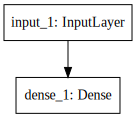

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(fc_model).create(prog='dot', format='svg'))

In [25]:
fc_model.compile(keras.optimizers.Adam(0.001), loss=crps_cost_function)

In [7]:
# Note: I am running this cell several times (40)
fc_model.fit(train_set.features, train_set.targets, epochs=10, batch_size=1024,
             validation_data=[test_set.features, test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 1s - loss: 2.9808 - val_loss: 1.9917
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 1.3618 - val_loss: 1.0581
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 1.0732 - val_loss: 1.0128
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 1.0693 - val_loss: 1.0120
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 1.0692 - val_loss: 1.0125
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 1.0692 - val_loss: 1.0135
Epoch 7/10
180849/180849 [==============================] - 1s - loss: 1.0693 - val_loss: 1.0121
Epoch 8/10
180849/180849 [==============================] - 1s - loss: 1.0692 - val_loss: 1.0124
Epoch 9/10
180849/180849 [==============================] - 1s - loss: 1.0693 - val_loss: 1.0123
Epoch 10/10
180849/180849 [==============================] - 1s - loss: 1.0

In [8]:
fc_model.evaluate(test_set.features, test_set.targets, 4096)

182218/182218 [==============================] - 0s     


1.0133071342532698

Very similar to the standard EMOS Network. This indicates that there is not much additional information in the two extra connections we added.

In [27]:
preds = fc_model.predict(test_set.features)
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'fc_network_train_2015_pred_2016.csv')

## Neural network with one hidden layer

Now we will build the first neural network with a hidden layer and a non-linear activation function. We will restrict ourselves to testing the 2015 training, 2016 prediction case.

### Build network

In [48]:
hidden_model = build_hidden_model(2, 2, hidden_nodes=10, compile=True)

In [49]:
hidden_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


### Train 2015, predict 2016

In [34]:
hidden_model.compile(keras.optimizers.Adam(0.0001), loss=crps_cost_function)

In [50]:
# We can use the same data from above!
# Note I am running this cell several times
hidden_model.fit(train_set.features, train_set.targets, epochs=10, batch_size=1024,
                 validation_data=[test_set.features, test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 4.1429 - val_loss: 1.4222
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 1.1146 - val_loss: 1.0142
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 1.0724 - val_loss: 1.0159
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 1.0716 - val_loss: 1.0158
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 1.0718 - val_loss: 1.0135
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 1.0715 - val_loss: 1.0147
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 1.0714 - val_loss: 1.0136
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 1.0710 - val_loss: 1.0144
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 1.0710 - val_loss: 1.0139
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 1.0

Again, the results are pretty similar. This indicates that for the given data, the added nonlinearity is not important.

In [36]:
preds = hidden_model.predict(test_set.features)
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'hidden_nn_train_2015_pred_2016.csv')

### Making the hidden model more complex

Let's see what happens if we make the model more complex

In [54]:
hidden_model = build_hidden_model(2, 2, hidden_nodes=[100, 100, 100], compile=True)

In [59]:
hidden_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 202       
Total params: 20,702
Trainable params: 20,702
Non-trainable params: 0
_________________________________________________________________


In [56]:
hidden_model.compile(keras.optimizers.Adam(0.0001), loss=crps_cost_function)

In [58]:
hidden_model.fit(train_set.features, train_set.targets, epochs=10, batch_size=4096,
                 validation_data=[test_set.features, test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0217
Epoch 2/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0224
Epoch 3/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0221
Epoch 4/10
180849/180849 [==============================] - 2s - loss: 1.0571 - val_loss: 1.0223
Epoch 5/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0221
Epoch 6/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0221
Epoch 7/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0223
Epoch 8/10
180849/180849 [==============================] - 2s - loss: 1.0570 - val_loss: 1.0223
Epoch 9/10
180849/180849 [==============================] - 2s - loss: 1.0569 - val_loss: 1.0219
Epoch 10/10
180849/180849 [==============================] - 2s - loss: 1.0

So we can see that even for a model with 20,000 parameters then training score only goes down a few percent. For a simple bias and spread correction, a linear model seems fully sufficient.

## Add station embeddings

Next we will add a station embedding. Here we are giving every station additional parameters which the model can learn.

### Build linear embedding model

Let's build a linear embedding model. I tried out hidden layers, but they seem to make the validation score worse!

In [9]:
emb_size = 3
max_id = int(np.max([train_set.cont_ids.max(), test_set.cont_ids.max()]))
max_id

536

In [87]:
emb_model = build_emb_model(2, 2, [], emb_size, max_id, compile=True,
                            lr=0.01)

In [88]:
emb_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_21 (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_6 (Embedding)          (None, 1, 3)          1611        input_21[0][0]                   
____________________________________________________________________________________________________
input_20 (InputLayer)            (None, 2)             0                                            
____________________________________________________________________________________________________
flatten_6 (Flatten)              (None, 3)             0           embedding_6[0][0]                
___________________________________________________________________________________________

### Train 2015, predict 2016

In [92]:
# Ran this for 40 epochs
emb_model.fit([train_set.features, train_set.cont_ids], train_set.targets, 
              epochs=10, batch_size=1024, 
              validation_data=[[test_set.features, test_set.cont_ids], test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 0.9690 - val_loss: 0.9132
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 0.9691 - val_loss: 0.9129
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 0.9690 - val_loss: 0.9129
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 0.9690 - val_loss: 0.9136
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 0.9691 - val_loss: 0.9132
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 0.9689 - val_loss: 0.9139
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 0.9689 - val_loss: 0.9131
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 0.9690 - val_loss: 0.9138
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 0.9689 - val_loss: 0.9128
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 0.9

In [93]:
preds = emb_model.predict([test_set.features, test_set.cont_ids])
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'embedding_fc_train_2015_pred_2016.csv')

### Embedding size hyper-parameter tuning

Since embeddings appear to work very well, we will test the impact of the embedding size before building more complex models. Of course, a larger embedding size might be useful when adding more variables, but this should give us some feeling.

In [94]:
def build_and_run_emb_model(emb_size):
    emb_model = build_emb_model(2, 2, [], emb_size, max_id, compile=True)
    emb_model.fit([train_set.features, train_set.cont_ids], train_set.targets, 
                  epochs=40,batch_size=1024, verbose=0,
                  validation_data=[[test_set.features, test_set.cont_ids], test_set.targets])
    print(emb_model.evaluate([train_set.features, train_set.cont_ids], train_set.targets, verbose=0),
          emb_model.evaluate([test_set.features, test_set.cont_ids], test_set.targets, verbose=0))

In [95]:
for emb_size in [1, 2, 3, 5, 10, 20]:
    print(emb_size)
    build_and_run_emb_model(emb_size)

1
0.975157575805 0.918841918992
2
0.96694133538 0.913661904937
3
0.967165116694 0.912928815584
5
0.967104299998 0.914134442874
10
0.968233569106 0.915652121524
20
0.969342381379 0.912989628939


Note that there is some variability. In our first experiment above with an embedding size of 5 we got a better score than here. For this very simple network an embedding size of three seems sufficient.

## Adding auxiliary variables

Now we can try adding additional variables.

### Load extended dataset

Using the function defined in utils.

In [6]:
# The prepare_data function takes an ordered dict as an input
aux_dict = OrderedDict()
aux_dict['data_aux_geo_interpolated.nc'] = ['orog', 
                                            'station_alt', 
                                            'station_lat', 
                                            'station_lon']
aux_dict['data_aux_pl500_interpolated_00UTC.nc'] = ['u_pl500_fc',
                                                    'v_pl500_fc',
                                                    'gh_pl500_fc']
aux_dict['data_aux_pl850_interpolated_00UTC.nc'] = ['u_pl850_fc',
                                                    'v_pl850_fc',
                                                    'q_pl850_fc']
aux_dict['data_aux_surface_interpolated_00UTC.nc'] = ['cape_fc',
                                                      'sp_fc',
                                                      'tcc_fc']

In [4]:
train_dates = ['2015-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']
train_set, test_set = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                         aux_dict=aux_dict)

train set contains 365 days
test set contains 366 days


In [5]:
train_set.features.shape

(180849, 24)

### Linear model

In [109]:
fc_model = build_fc_model(train_set.features.shape[1], 2, compile=True, 
                          lr=0.01)

In [115]:
# Note that I am running this cell multiple times
fc_model.fit(train_set.features, train_set.targets, epochs=10, batch_size=1024,
             validation_data=[test_set.features, test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 0.9701 - val_loss: 0.9389
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 0.9699 - val_loss: 0.9395
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 0.9699 - val_loss: 0.9405
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 0.9700 - val_loss: 0.9385
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 0.9702 - val_loss: 0.9380
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 0.9699 - val_loss: 0.9385
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 0.9699 - val_loss: 0.9384
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 0.9699 - val_loss: 0.9400
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 0.9698 - val_loss: 0.9388
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 0.9

In [ ]:
preds = fc_model.predict([test_set.features, test_set.cont_ids])
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'embedding_fc_train_2015_pred_2016.csv')

### Hidden model

In [154]:
hidden_model = build_hidden_model(train_set.features.shape[1], 2, 
                                  hidden_nodes=[50], compile=True)

In [155]:
hidden_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        (None, 24)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                1250      
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 102       
Total params: 1,352
Trainable params: 1,352
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Note that I am running this cell multiple times
hidden_model.fit(train_set.features, train_set.targets, epochs=10, batch_size=1024,
             validation_data=[test_set.features, test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 0.9388 - val_loss: 0.9402
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 0.9348 - val_loss: 0.9332
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 0.9346 - val_loss: 0.9367
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 0.9295 - val_loss: 0.9418
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 0.9292 - val_loss: 0.9356
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 0.9275 - val_loss: 0.9392
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 0.9253 - val_loss: 0.9365
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 0.9251 - val_loss: 0.9378
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 0.9239 - val_loss: 0.9441
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 0.9

So we see a definite improvement using auxiliary variables. Again, the hidden layer does not seem to improve things a lot compared to the simple linear model.

### Even more variables

In [7]:
more_aux_dict = aux_dict

In [8]:
more_aux_dict['data_aux_surface_more_interpolated_part1_00UTC.nc']  = [
    'sshf_fc', 'slhf_fc', 'u10_fc','v10_fc'
]
more_aux_dict['data_aux_surface_more_interpolated_part2_00UTC.nc']  = [
    'ssr_fc', 'str_fc', 'd2m_fc','sm_fc'
]

In [6]:
train_dates = ['2015-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']

In [7]:
more_train_set, more_test_set = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                         aux_dict=more_aux_dict)

train set contains 365 days
test set contains 366 days


In [8]:
more_train_set.features.shape

(180849, 40)

### Save pickled datasets

In [4]:
import pickle

In [10]:
%ls $DATA_DIR

auxiliary/                  data_interpolated_00UTC.nc*
data_interpolated.nc*


In [11]:
with open(DATA_DIR + 'aux_15_16.pkl', 'wb') as f:
    pickle.dump((more_train_set, more_test_set), f)

In [10]:
def save_pickle(fn, train_dates=['2015-01-01', '2016-01-01'], add_current_error=False,
                current_error_len=1):
    sets = get_train_test_sets(
        DATA_DIR, train_dates, test_dates, aux_dict=more_aux_dict,
        add_current_error=add_current_error, current_error_len=current_error_len
    )
    with open(DATA_DIR + fn, 'wb') as f:
        pickle.dump(sets, f)

In [12]:
save_pickle('aux_15_16_current30.pkl', ['2015-01-01', '2016-01-01'], 
            add_current_error=True, current_error_len=30)

train set contains 365 days
test set contains 366 days


In [18]:
save_pickle('aux_14-15_16.pkl', ['2014-01-01', '2016-01-01'])
save_pickle('aux_13-15_16.pkl', ['2013-01-01', '2016-01-01'])
save_pickle('aux_10-15_16.pkl', ['2010-01-01', '2016-01-01'])
save_pickle('aux_08-15_16.pkl', ['2008-01-01', '2016-01-01'])

train set contains 730 days
test set contains 366 days
train set contains 1095 days
test set contains 366 days
train set contains 2191 days
test set contains 366 days
train set contains 2922 days
test set contains 366 days


In [19]:
save_pickle('aux_12-15_16.pkl', ['2012-01-01', '2016-01-01'])
save_pickle('aux_11-15_16.pkl', ['2011-01-01', '2016-01-01'])

train set contains 1461 days
test set contains 366 days
train set contains 1826 days
test set contains 366 days


### Train model

In [10]:
fc_model = build_fc_model(more_train_set.features.shape[1], 2, compile=True, 
                          lr=0.01)

In [15]:
# Note that I am running this cell multiple times
fc_model.fit(more_train_set.features, more_train_set.targets, epochs=10, batch_size=1024,
             validation_data=[more_test_set.features, more_test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 0.9540 - val_loss: 0.9163
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 0.9542 - val_loss: 0.9231
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 0.9546 - val_loss: 0.9159
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 0.9546 - val_loss: 0.9242
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 0.9544 - val_loss: 0.9152
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 0.9549 - val_loss: 0.9251
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 0.9545 - val_loss: 0.9161
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 0.9542 - val_loss: 0.9193
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 0.9545 - val_loss: 0.9177
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 0.9

Adding these extra variables gets us another percent or so

## Additional variables with the embedding model

### Linear model with embeddings

In [10]:
emb_model = build_emb_model(train_set.features.shape[1], 2, [], 3, max_id, 
                            compile=True, lr=0.01)

In [11]:
emb_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 3)          1611        input_2[0][0]                    
____________________________________________________________________________________________________
input_1 (InputLayer)             (None, 24)            0                                            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 3)             0           embedding_1[0][0]                
___________________________________________________________________________________________

In [15]:
emb_model.optimizer.lr=0.001

In [17]:
# Again I am running this multiple times
emb_model.fit([train_set.features, train_set.cont_ids], train_set.targets, epochs=10, 
              batch_size=1024, 
              validation_data=[[test_set.features, test_set.cont_ids], test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 0.9234 - val_loss: 0.9007
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 0.9232 - val_loss: 0.8995
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 0.9233 - val_loss: 0.8985
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 0.9231 - val_loss: 0.9004
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 0.9231 - val_loss: 0.8981
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 0.9230 - val_loss: 0.8987
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 0.9232 - val_loss: 0.8977
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 0.9231 - val_loss: 0.8979
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 0.9229 - val_loss: 0.8969
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 0.9

### Hidden model with embeddings

In [16]:
emb_model = build_emb_model(train_set.features.shape[1], 2, [50], 3, max_id, 
                            compile=True, lr=0.01)

NameError: name 'train_set' is not defined

In [149]:
# Again I am running this multiple times
emb_model.fit([train_set.features, train_set.cont_ids], train_set.targets, epochs=10, 
              batch_size=4096, 
              validation_data=[[test_set.features, test_set.cont_ids], test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/10
180849/180849 [==============================] - 0s - loss: 0.8592 - val_loss: 0.8559
Epoch 2/10
180849/180849 [==============================] - 0s - loss: 0.8536 - val_loss: 0.8559
Epoch 3/10
180849/180849 [==============================] - 0s - loss: 0.8524 - val_loss: 0.8590
Epoch 4/10
180849/180849 [==============================] - 0s - loss: 0.8498 - val_loss: 0.8570
Epoch 5/10
180849/180849 [==============================] - 0s - loss: 0.8500 - val_loss: 0.8580
Epoch 6/10
180849/180849 [==============================] - 0s - loss: 0.8478 - val_loss: 0.8885
Epoch 7/10
180849/180849 [==============================] - 0s - loss: 0.8465 - val_loss: 0.8572
Epoch 8/10
180849/180849 [==============================] - 0s - loss: 0.8449 - val_loss: 0.8564
Epoch 9/10
180849/180849 [==============================] - 0s - loss: 0.8438 - val_loss: 0.8583
Epoch 10/10
180849/180849 [==============================] - 0s - loss: 0.8

This is our best score so far. Here the non-linearity seems to make a difference compared to the simple linear model. But we do get some overfitting. Let's try out some techniques. Fewer or more hidden nodes does not seem to change all that much.

No we need to be very careful here. I am currently stopping when the validation score does not decrease further. THIS IS CHEATING!

Let's try doing the train valid split just with the training set, and see if we can get a good early stopping point.

In [41]:
max_id = int(np.max([train_set.cont_ids.max(), test_set.cont_ids.max()]))

In [35]:
emb_model = build_emb_model(train_set.features.shape[1], 2, [50], 3, max_id, 
                            compile=True, lr=0.01)

In [36]:
# Again I am running this multiple times
emb_model.fit([train_set.features, train_set.cont_ids], train_set.targets, epochs=50, 
              batch_size=4096, validation_split=0.2,
              callbacks=[EarlyStopping(monitor='val_loss', 
                                       min_delta=0,
                                       patience=2)])

Train on 144679 samples, validate on 36170 samples
Epoch 1/50
144679/144679 [==============================] - 0s - loss: 4.6977 - val_loss: 2.3896
Epoch 2/50
144679/144679 [==============================] - 0s - loss: 2.5777 - val_loss: 1.8083
Epoch 3/50
144679/144679 [==============================] - 0s - loss: 1.3762 - val_loss: 1.1476
Epoch 4/50
144679/144679 [==============================] - 0s - loss: 1.0260 - val_loss: 1.0796
Epoch 5/50
144679/144679 [==============================] - 0s - loss: 0.9704 - val_loss: 1.0552
Epoch 6/50
144679/144679 [==============================] - 0s - loss: 0.9508 - val_loss: 1.0323
Epoch 7/50
144679/144679 [==============================] - 0s - loss: 0.9369 - val_loss: 1.0165
Epoch 8/50
144679/144679 [==============================] - 0s - loss: 0.9260 - val_loss: 1.0029
Epoch 9/50
144679/144679 [==============================] - 0s - loss: 0.9199 - val_loss: 0.9962
Epoch 10/50
144679/144679 [==============================] - 0s - loss: 0.91

In [37]:
emb_model.evaluate([test_set.features, test_set.cont_ids], test_set.targets, batch_size=10000)

170000/182218 [==========================>...] - ETA: 0s

0.8661767004406562

In [38]:
preds = emb_model.predict([test_set.features, test_set.cont_ids])
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'embedding_nn_aux_train_2015_pred_2016.csv')

### A longer training period

In [40]:
long_train_dates = ['2008-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']
long_train_set, test_set = get_train_test_sets(DATA_DIR, long_train_dates, test_dates,
                                               aux_dict=aux_dict)

train set contains 2922 days
test set contains 366 days


In [15]:
emb_model = build_emb_model(long_train_set.features.shape[1], 2, [50], 3, max_id, 
                            compile=True, lr=0.01)

NameError: name 'long_train_set' is not defined

In [43]:
# Again I am running this multiple times
emb_model.fit([long_train_set.features, long_train_set.cont_ids], long_train_set.targets, 
              epochs=50, 
              batch_size=4096, validation_split=0.2,
              callbacks=[EarlyStopping(monitor='val_loss', 
                                       min_delta=0,
                                       patience=5)]);

Train on 1165581 samples, validate on 291396 samples
Epoch 1/50
1165581/1165581 [==============================] - 2s - loss: 1.4502 - val_loss: 0.9145
Epoch 2/50
1165581/1165581 [==============================] - 1s - loss: 0.9202 - val_loss: 0.8564
Epoch 3/50
1165581/1165581 [==============================] - 1s - loss: 0.8807 - val_loss: 0.8377
Epoch 4/50
1165581/1165581 [==============================] - 1s - loss: 0.8701 - val_loss: 0.8407
Epoch 5/50
1165581/1165581 [==============================] - 1s - loss: 0.8637 - val_loss: 0.8339
Epoch 6/50
1165581/1165581 [==============================] - 1s - loss: 0.8568 - val_loss: 0.8292
Epoch 7/50
1165581/1165581 [==============================] - 2s - loss: 0.8490 - val_loss: 0.8261
Epoch 8/50
1165581/1165581 [==============================] - 1s - loss: 0.8440 - val_loss: 0.8225
Epoch 9/50
1165581/1165581 [==============================] - 1s - loss: 0.8399 - val_loss: 0.8217
Epoch 10/50
1165581/1165581 [===========================

In [44]:
emb_model.evaluate([test_set.features, test_set.cont_ids], test_set.targets, batch_size=10000)

170000/182218 [==========================>...] - ETA: 0s

0.7918927852063512

In [45]:
preds = emb_model.predict([test_set.features, test_set.cont_ids])
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'embedding_nn_aux_train_2008-2015_pred_2016.csv')

### A longer training period with more data

In [46]:
long_more_train_set, more_test_set = get_train_test_sets(DATA_DIR, long_train_dates, test_dates,
                                                         aux_dict=more_aux_dict)

train set contains 2922 days
test set contains 366 days


In [51]:
emb_model = build_emb_model(long_more_train_set.features.shape[1], 2, [100], 3, max_id, 
                            compile=True, lr=0.01)

In [52]:
# Again I am running this multiple times
emb_model.fit([long_more_train_set.features, long_more_train_set.cont_ids], 
              long_more_train_set.targets, 
              epochs=50, batch_size=4096, validation_split=0.2,
              callbacks=[EarlyStopping(monitor='val_loss', 
                                       min_delta=0,
                                       patience=5)])

Train on 1165581 samples, validate on 291396 samples
Epoch 1/50
1165581/1165581 [==============================] - 2s - loss: 1.4866 - val_loss: 0.8848
Epoch 2/50
1165581/1165581 [==============================] - 2s - loss: 0.8875 - val_loss: 0.8467
Epoch 3/50
1165581/1165581 [==============================] - 2s - loss: 0.8628 - val_loss: 0.8289
Epoch 4/50
1165581/1165581 [==============================] - 1s - loss: 0.8504 - val_loss: 0.8384
Epoch 5/50
1165581/1165581 [==============================] - 1s - loss: 0.8424 - val_loss: 0.8217
Epoch 6/50
1165581/1165581 [==============================] - 1s - loss: 0.8376 - val_loss: 0.8203
Epoch 7/50
1165581/1165581 [==============================] - 1s - loss: 0.8350 - val_loss: 0.8143
Epoch 8/50
1165581/1165581 [==============================] - 1s - loss: 0.8291 - val_loss: 0.8176
Epoch 9/50
1165581/1165581 [==============================] - 1s - loss: 0.8281 - val_loss: 0.8141
Epoch 10/50
1165581/1165581 [===========================

In [53]:
emb_model.evaluate([more_test_set.features, more_test_set.cont_ids], more_test_set.targets, 
                   batch_size=10000)

170000/182218 [==========================>...] - ETA: 0s

0.79416574978415233

In [54]:
preds = emb_model.predict([more_test_set.features, more_test_set.cont_ids])
results_df = create_results_df(test_set.date_strs, test_set.station_ids,
                               preds[:, 0], preds[:, 1])
results_df.to_csv(results_dir + 'embedding_nn_more_aux_train_2008-2015_pred_2016.csv')

## Data augmentation

Let's pick a setup where overfitting is a problem: emb_train_2015_aux 

In [24]:
with open(DATA_DIR + 'aux_15_16.pkl', 'rb') as f:
    train_set, test_set = pickle.load(f)

In [25]:
train_set.features.shape

(180849, 40)

In [30]:
train_set.features.std(axis=0)

array([  0.25074708,   0.09660812,   0.1843026 ,   0.09279162,
         0.03468666,   0.13954796,   0.22625588,   0.07106367,
         0.30288959,   0.08776672,   0.02569887,   0.09980575,
         0.23046067,   0.06643367,   0.20091382,   0.08406494,
         0.19337422,   0.11743076,   0.05346011,   0.06231587,
         0.02710444,   0.0817729 ,   0.31899199,   0.23367222,
         0.30816635,   0.09623598,   0.91393036,   0.1034622 ,
         0.13670425,   0.05991281,   0.13355759,   0.05574263,
         0.23230664,   0.14413203,  12.44298172,   0.10215613,
         0.02040521,   0.09879841,   0.15911838,   0.10272128], dtype=float32)

In [31]:
train_set.features.mean(axis=0)[1::2]

array([ 0.23806411,  0.09815978,  0.6862545 ,  0.17456083,  0.1688834 ,
        0.22585876,  0.17900802,  0.21563105,  0.19999588,  0.01879581,
        0.20672929,  0.44667143,  0.15995905,  0.14729995,  0.10025162,
        0.09625338,  0.20209451,  0.26052597,  0.21735674,  0.11991174], dtype=float32)

In [32]:
train_set.features.std(axis=0)[::2]

array([  0.25074708,   0.1843026 ,   0.03468666,   0.22625588,
         0.30288959,   0.02569887,   0.23046067,   0.20091382,
         0.19337422,   0.05346011,   0.02710444,   0.31899199,
         0.30816635,   0.91393036,   0.13670425,   0.13355759,
         0.23230664,  12.44298172,   0.02040521,   0.15911838], dtype=float32)

In [34]:
scales = np.zeros(train_set.features.shape[1])
scales[1::2] = train_set.features.mean(axis=0)[1::2]
scales[::2] = train_set.features.std(axis=0)[::2]

In [55]:
features_aug = train_set.features + np.random.normal(size=train_set.features.shape) * scales * 0.05

In [56]:
targets_aug = train_set.targets + np.random.normal(scale=0.1, size=train_set.targets.shape)

In [57]:
train_set.targets[:5], targets_aug[:5]

(array([ 2.20000005, -3.70000005, -2.0999999 ,  1.60000002,  0.60000002], dtype=float32),
 array([ 2.11051623, -3.64067068, -2.10724395,  1.64481148,  0.62672574]))

In [40]:
np.concatenate([train_set.features, features_aug], axis=0).shape

(361698, 40)

In [58]:
emb_model = build_emb_model(train_set.features.shape[1], 2, [100], 3, max_id, 
                            compile=True, lr=0.01)

In [45]:
emb_model.fit([train_set.features, train_set.cont_ids], train_set.targets, 
              epochs=50, batch_size=4096, 
              validation_data=[[test_set.features, test_set.cont_ids], test_set.targets])

Train on 180849 samples, validate on 182218 samples
Epoch 1/50
180849/180849 [==============================] - 1s - loss: 3.2343 - val_loss: 2.0386
Epoch 2/50
180849/180849 [==============================] - 1s - loss: 1.5920 - val_loss: 1.2551
Epoch 3/50
180849/180849 [==============================] - 1s - loss: 1.1297 - val_loss: 1.0354
Epoch 4/50
180849/180849 [==============================] - 1s - loss: 1.0138 - val_loss: 0.9986
Epoch 5/50
180849/180849 [==============================] - 1s - loss: 0.9730 - val_loss: 0.9816
Epoch 6/50
180849/180849 [==============================] - 1s - loss: 0.9539 - val_loss: 0.9707
Epoch 7/50
180849/180849 [==============================] - 1s - loss: 0.9516 - val_loss: 0.9200
Epoch 8/50
180849/180849 [==============================] - 1s - loss: 0.9236 - val_loss: 0.9069
Epoch 9/50
180849/180849 [==============================] - 1s - loss: 0.9131 - val_loss: 0.9088
Epoch 10/50
180849/180849 [==============================] - 2s - loss: 0.9

In [59]:
emb_model.fit([
    np.concatenate([train_set.features, features_aug], axis=0), 
    np.concatenate([train_set.cont_ids, train_set.cont_ids])
                   ], np.concatenate([train_set.targets, targets_aug]), 
              epochs=50, batch_size=4096, 
              validation_data=[[test_set.features, test_set.cont_ids], test_set.targets])

Train on 361698 samples, validate on 182218 samples
Epoch 1/50
361698/361698 [==============================] - 2s - loss: 2.1479 - val_loss: 1.1412
Epoch 2/50
361698/361698 [==============================] - 1s - loss: 1.0383 - val_loss: 0.9549
Epoch 3/50
361698/361698 [==============================] - 1s - loss: 0.9582 - val_loss: 0.9531
Epoch 4/50
361698/361698 [==============================] - 1s - loss: 0.9008 - val_loss: 0.8797
Epoch 5/50
361698/361698 [==============================] - 1s - loss: 0.8987 - val_loss: 0.8848
Epoch 6/50
361698/361698 [==============================] - 1s - loss: 0.8709 - val_loss: 0.8621
Epoch 7/50
361698/361698 [==============================] - 1s - loss: 0.8752 - val_loss: 0.8749
Epoch 8/50
361698/361698 [==============================] - 1s - loss: 0.8617 - val_loss: 0.8502
Epoch 9/50
361698/361698 [==============================] - 1s - loss: 0.8640 - val_loss: 0.8468
Epoch 10/50
361698/361698 [==============================] - 1s - loss: 0.8

In [69]:
# Test current error
train_dates = ['2015-01-01', '2016-01-01']
test_dates =  ['2016-01-01', '2017-01-01']
train_set, test_set = get_train_test_sets(DATA_DIR, train_dates, test_dates,
                                          add_current_error=True, 
                                          current_error_len=3)

train set contains 365 days
test set contains 366 days


In [70]:
train_set.features.shape

(195929, 11)

In [71]:
train_set.feature_names

['t2m_fc_mean',
 't2m_fc_std',
 'curr_t2m_fc_mean',
 'curr_t2m_fc_obs',
 'curr_err',
 'curr_t2m_fc_mean_m1',
 'curr_t2m_fc_obs_m1',
 'curr_err_m1',
 'curr_t2m_fc_mean_m2',
 'curr_t2m_fc_obs_m2',
 'curr_err_m2']